In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data_a = pd.read_csv('HH_SEC_A.csv')
data_c = pd.read_csv('HH_SEC_C.csv')

In [20]:
data_a.columns

Index(['interview__key', 'sdd_hhid', 'hh_a06', 'sdd_rural', 'domain',
       'strataid', 'sdd_cluster', 'clusterid', 'sdd_weights', 'loc_info',
       't0_region', 't0_district', 't0_ward', 't0_ward_code', 't0_village',
       't0_ea', 't0_ea_codee', 't0_mtaa', 'hh_a01_1', 'hh_a02_1', 'hh_a03_1',
       'hh_a03_2', 'hh_a03_3a', 'hh_a03_3b', 'hh_a04_1', 'hh_a04_2', 'hh_a05',
       'current_loc_desc', 't0_location', 'y4_hhid', 'hh_a10',
       'tracking_class', 't0_head', 't0_headphone', 'hh_tracking_status',
       'hh_a18', 'int_month_code', 'Int_End', 'TotInt_Mins', 'int_result',
       'wqt_selection', 'wqt_prob', 'wqt_blank_s', 'wqt_blank_p'],
      dtype='object')

In [21]:
data_c.columns

Index(['interview__key', 'sdd_hhid', 'sdd_indid', 'hh_c01', 'hh_c01_1',
       'hh_c01_2', 'hh_c02', 'hh_c03', 'hh_c03_1', 'hh_c04', 'hh_c05',
       'hh_c05a', 'hh_c06', 'hh_c07', 'hh_c08', 'hh_c09', 'hh_c10', 'hh_c11',
       'hh_c12', 'hh_c13', 'hh_c14', 'hh_c15', 'hh_c16', 'hh_c17', 'hh_c18',
       'hh_c19', 'hh_c20_1', 'hh_c20_2', 'hh_c21_1', 'hh_c21_2', 'hh_c22',
       'hh_c23', 'hh_c24', 'hh_c25', 'hh_c26', 'hh_c27', 'hh_c28_0',
       'hh_c28_1', 'hh_c28_2', 'hh_c28_3', 'hh_c28_4', 'hh_c28_5', 'hh_c28_6',
       'hh_c28_7', 'hh_c28_8', 'hh_c29', 'hh_c30', 'hh_c01_3'],
      dtype='object')

In [23]:
merged = pd.merge(data_a[["sdd_hhid", "sdd_rural", "t0_region", "t0_district"]], data_c[["sdd_hhid","hh_c14", "hh_c15"]], on='sdd_hhid', how='inner')
merged

,sdd_hhid,sdd_rural,t0_region,t0_district,hh_c14,hh_c15
0,0001-001-001,RURAL,DODOMA,KONDOA,NaN,NaN
1,0001-001-001,RURAL,DODOMA,KONDOA,NaN,NaN
2,0001-001-003,RURAL,NaN,NaN,NaN,NaN
3,0001-001-004,URBAN,NaN,NaN,NaN,NaN
4,0001-004-001,RURAL,DODOMA,KONDOA,NaN,NaN
...,...,...,...,...,...,...
5582,0858-001-002,URBAN,NaN,NaN,ON FOOT,7.0
5583,0858-001-002,URBAN,NaN,NaN,NaN,NaN
5584,0858-001-002,URBAN,NaN,NaN,ON FOOT,13.0
5585,0858-001-002,URBAN,NaN,NaN,ON FOOT,18.0


In [24]:
filtered_data = merged[merged["hh_c14"].notna()]
filtered_data.to_csv("distance2school.csv", index=False)
filtered_data = merged[merged["hh_c14"].notna() & merged["t0_region"].notna()]
filtered_data.to_csv("distance2school_region.csv", index=False)

In [25]:
filtered_data = merged[merged["hh_c14"].notna()]

C:\Users\coro\AppData\Local\Temp\ipykernel_279012\2353842909.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


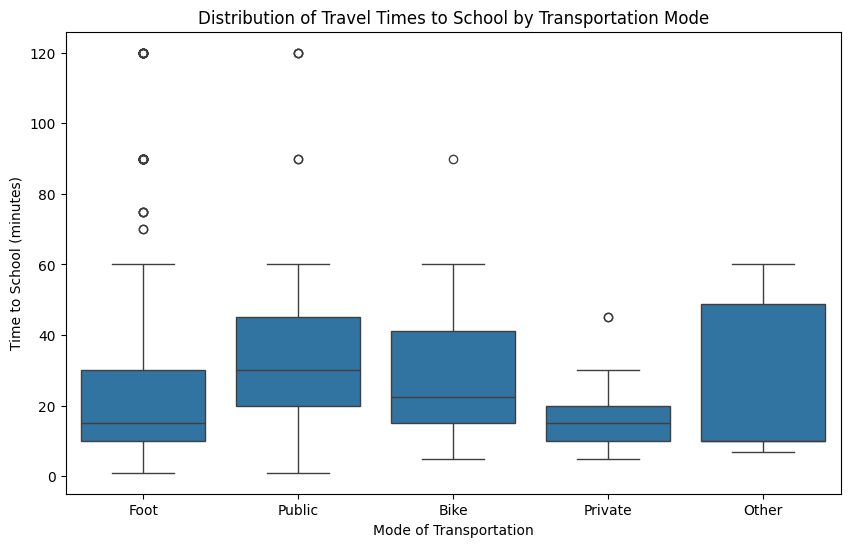

In [26]:
label_dict = {
    'ON FOOT': 'Foot',
    'BY BIKE': 'Bike',
    'BY PRIVATE CAR/VEHICLE': 'Private',
    'BY PUBLIC VEHICLE/MINIBUS': 'Public',
    'OTHER (SPECIFY)': 'Other'
}

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='hh_c14', y='hh_c15', data=filtered_data, order=filtered_data['hh_c14'].value_counts().index)
ax.set_title('Distribution of Travel Times to School by Transportation Mode')
ax.set_xlabel('Mode of Transportation')
ax.set_ylabel('Time to School (minutes)')

# Retrieve the current labels and set them to the new labels based on the label_dict
new_labels = [label_dict.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels)
plt.savefig('transportation_time.png', dpi=400)
plt.show()



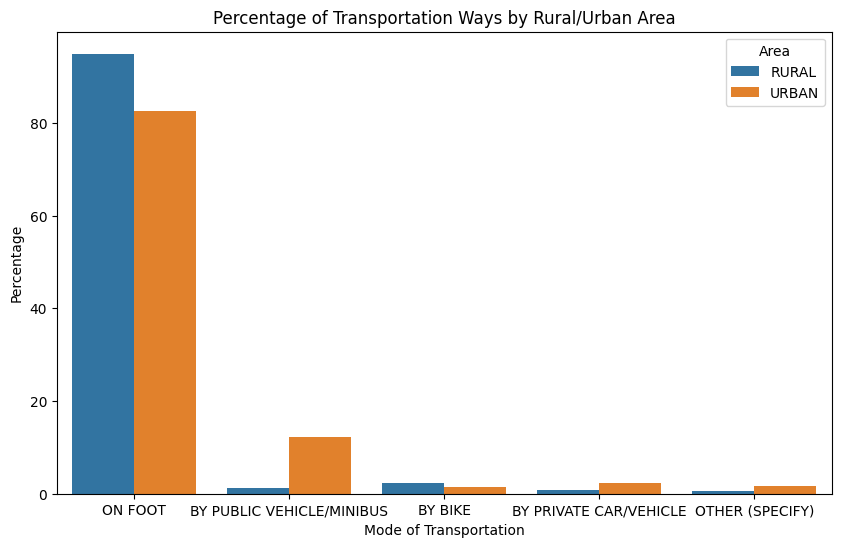

In [27]:

# Step 1: Filter out rows where 'hh_c14' is NaN
data_with_transport = filtered_data.dropna(subset=['hh_c14'])

# Step 2: Calculate the percentage of each transportation way
# Group the data by 'sdd_rural' and 'hh_c14' and count the occurrences
transport_counts = data_with_transport.groupby(['sdd_rural', 'hh_c14']).size().reset_index(name='counts')

# Calculate the total counts for each 'sdd_rural' to find the percentage
total_counts = transport_counts.groupby('sdd_rural')['counts'].transform('sum')

# Add a new column for percentages
transport_counts['percentage'] = transport_counts['counts'] / total_counts * 100

# Calculate the combined percentage for rural and urban together
combined_percentages = transport_counts.groupby('hh_c14')['percentage'].sum().reset_index()

# Merge the combined percentages back into the transport_counts DataFrame
transport_counts = transport_counts.merge(combined_percentages, on='hh_c14', suffixes=('', '_combined'))

# Step 3: Sort the DataFrame based on the combined percentage
transport_counts = transport_counts.sort_values(by='percentage_combined', ascending=False)

# Now plot with the sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x='hh_c14', y='percentage', hue='sdd_rural', data=transport_counts, order=transport_counts['hh_c14'].unique())

plt.title('Percentage of Transportation Ways by Rural/Urban Area')
plt.xlabel('Mode of Transportation')
plt.ylabel('Percentage')
plt.legend(title='Area')
plt.savefig('transportation.png', dpi=400)
plt.show()
